<a href="https://colab.research.google.com/github/Er-Devjyoti/Er-Devjyoti/blob/main/Copy_of_CS985_Emotion_Task_Group_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cs985-987-Emotion-Recognition-Project

## Group J - Devjyoti Das


### Dataset Description
The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

The training set consists of 28,709 examples. The public test set used for the leaderboard consists of 3,589 examples. The final test set, which was used to determine the winner of the competition, consists of another 3,589 examples.

They have graciously provided the workshop organizers with a preliminary version of their dataset to use for this contest.


##Overview:

The Emotion recognition task starts with exploration of the categorical dataset. This task has 7 output categories and these categories are predicted at the output. Now, the images in the dataset is stored in numbered pixel format and has 27752 unique values. There are 7 emotions in the dataset and the shape of the labels are (29000, 7).

According to the task our approach is straight forward. and we have tried to implement 3 different models namely, standard Ml, DNN Model and lastly transfer Learning. Since this is a numerical based categorical data and there can be irregularities. Thus, we have conducted a pre data analysis and PCA (limited columns) on the dataset.

##Standard ML Baseline
Algorithms covered:
1. Logistic Regression
2. Random Forest
3. Support Vector Machine

###Method
The exploration of the dataset has showed us few effects when using any ML model:


1.   The dataset is non-linear and arbitary in nature. That can be explained due to the pixels column in the data.  

2.   If we remove the Id column there can be mostly negative effect on the models since the models uses Id in some manner to deduce the categories. 

3. We also tried to pre-process the data using normalizationa and augmentation since it is already a gray scale image pixel representation. However, the data is in string format and hence we decided to convert into an array format. 

4. Though standard scalar normalization helps the ML models for better accuracy. The data augmentation worsenes the output. Thus we have not included the augmentation. 

5. To train the data better and test it initially we have also splitted the data into train and validation for prior preformance knowledge. 

6. For feature reduction we have also included the PCA that helps us to further improve the ML algo performance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ML Algorithm Used
The basic ML model has been based on 3 different algorithm namely, Logistic Regression, Random Forest and SVM. All these 3 models were chosen over other ML models after rigorously testing the dataset (with and without augmenttation) and we are only including the top 3 performing models.

We are using the sklearn libraries to call the preprocessing and Ml models.

Firstly, we are using non-linear and categorical Ml algoritms as per our dataset. We are not fine tuning the basic model further since we would be using more complex models ahead like DNN and Transfer Learning that can give us better results.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import keras.backend as K

In [ ]:
# load train and test data
train_data = pd.read_csv('/content/drive/MyDrive/my_emotion_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/my_emotion_test.csv')


In [ ]:
# split train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data["pixels"], train_data["emotion"], test_size=0.2, random_state=42)

In [ ]:
# preprocess data
X_train = np.array([np.fromstring(x, dtype=int, sep=' ') for x in X_train])
X_val = np.array([np.fromstring(x, dtype=int, sep=' ') for x in X_val])
test_data = np.array([np.fromstring(x, dtype=int, sep=' ') for x in test_data["pixels"]])


In [ ]:
# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data = scaler.transform(test_data)


In [ ]:
# perform PCA for feature reduction
pca = PCA(n_components=0.88, random_state=60)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
test_data = pca.transform(test_data)


In [ ]:
# train and evaluate logistic regression
lr = Pipeline(steps=[('lr', LogisticRegression())])
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

#mean = K.mean(y_pred_lr)
#std = K.std(y_pred_lr)

#print('Mean:', mean)
#print('Standard deviation:', std)
print("Logistic Regression accuracy:", accuracy_score(y_val, y_pred_lr))


Logistic Regression accuracy: 0.3793103448275862


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# train and evaluate random forest
rf = Pipeline(steps=[('rf', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# Compute the mean and standard deviation of the output
#mean = K.mean(y_pred_rf)
#std = K.std(y_pred_rf)

#print('Mean:', mean)
#print('Standard deviation:', std)
print("Random Forest accuracy:", accuracy_score(y_val, y_pred_rf))


Random Forest accuracy: 0.4232758620689655


In [ ]:
# train and evaluate support vector machine
svm = Pipeline(steps=[('svm', SVC())])
svm.fit(X_train, y_train)

# Get the output of the model
#output = svm.predict(X_test)

# Compute the mean and standard deviation of the output
#mean = K.mean(output)
#std = K.std(output)

#print('Mean:', mean)
#print('Standard deviation:', std)

y_pred_svm = svm.predict(X_val)
print("Support Vector Machine accuracy:", accuracy_score(y_val, y_pred_svm))


Support Vector Machine accuracy: 0.44189655172413794


In [ ]:
# make predictions on test data using the best model
test_preds = rf.predict(test_data)

# save predictions to a file
submission = pd.DataFrame({'id': range(len(test_data)), 'emotion': test_preds})
submission.to_csv("submission.csv", index=False)


### Deep NN models

For this DNN model multiple different configurations were tried with different combinations of layers and neurons. The first thing that was done was to use a Flatten layer to make the multidimensional input of the images one-dimensional. Since our dataset consists of images of size 48x48x1 (grayscale), we initialised the model with a layer with neurons equal the size of the input which is 2304 (48x48). In this way each neuron in the input layer corresponds to a single pixel in the images. The activation function that is used is the ReLU. The ReLU activation outputs the input directly if it is positive, or a zero if the input is zero or negative. It is one of the most popular activation functions due to its advantages of [1] computational simplicity, linear behaviour even though it is a non-linear function, and its ability to output a true zero value, unlike other activation functions like the sigmoid which only approximates a value close to zero. These are the major reasons why ReLU was chosen. 

7 hidden layers follow the input layer. The number of hidden layers is purely based on trial and error and is the one that gave us the best accuracy out of all different configurations tried. The choice of the number of neurons of each layer is based on the rule-of-thumb [2], which states that the number of neurons of hidden layers must be between the size of the input layer and the size of the output layer, and also it must be around 2/3 the size of the input layer plus the output layer. Here the first hidden layer has 2000 neurons as it was found to perform better than the 1536 neurons which is the 2/3 of the input. After that the number of neurons gradually reduces in subsequent hidden layers as we move closer to the output. 

Since the dataset has 7 different output classes, 1 for each emotion, the output layer has 7 neurons, one for each class. The softmax activation function is used here to normalise the outputs by converting them into a vector that the weighted sum equals one and so the output can be considered as probabilities [3]. 

To prevent overfitting we made use of dropout after each layer.The model was compiled using a relatively small learning rate of 0.0001 as larger ones were creating an unwanted divergent behaviour in the validation accuracy and the loss.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D, Input, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import keras.backend as K
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/my_emotion_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/my_emotion_test.csv")


In [ ]:
def preprocess_images(data):
    data = data.pixels.apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))
    data = np.stack(data, axis=0)
    data.shape
    return data / 255.0


In [ ]:
train_images = preprocess_images(train_data)
test_images = preprocess_images(test_data)
print('Train images shape:', (train_images.shape))
print('Test images shape:', (test_images.shape))


Train images shape: (29000, 48, 48, 1)
Test images shape: (6887, 48, 48, 1)


In [ ]:
y = train_data.emotion

# Splitting the training data to training and validation
X_train, X_valid, y_train, y_valid = train_test_split(train_images, y, test_size=0.2, random_state=42)
print('Train set shape: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Validation set shape: X=%s, y=%s' % (X_valid.shape, y_valid.shape))


Train set shape: X=(23200, 48, 48, 1), y=(23200,)
Validation set shape: X=(5800, 48, 48, 1), y=(5800,)


In [ ]:
model_DNN = tf.keras.Sequential()
model_DNN.add(Flatten(input_shape=(48,48,1)))
model_DNN.add(Dense(2304, activation='relu'))
#model_DNN.add(BatchNormalization())
model_DNN.add(Dense(2000, activation='relu'))
#model_DNN.add(BatchNormalization())
model_DNN.add(Dropout(0.35))
model_DNN.add(Dense(1750, activation='relu'))
#model_DNN.add(BatchNormalization())
model_DNN.add(Dropout(0.35))
model_DNN.add(Dense(1500, activation='relu'))
#model_DNN.add(BatchNormalization())
model_DNN.add(Dropout(0.25))
model_DNN.add(Dense(1500, activation='relu'))
#model_DNN.add(BatchNormalization())
model_DNN.add(Dropout(0.25))
model_DNN.add(Dense(1000, activation='relu'))
#model_DNN.add(BatchNormalization())
model_DNN.add(Dropout(0.25))
model_DNN.add(Dense(1000, activation='relu'))
#model_DNN.add(BatchNormalization())
model_DNN.add(Dropout(0.25))
model_DNN.add(Dense(500, activation='relu'))
#model_DNN.add(BatchNormalization())
model_DNN.add(Dropout(0.25))
model_DNN.add(Dense(7, activation='softmax'))

model_DNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 2304)              5310720   
                                                                 
 dense_10 (Dense)            (None, 2000)              4610000   
                                                                 
 dropout_7 (Dropout)         (None, 2000)              0         
                                                                 
 dense_11 (Dense)            (None, 1750)              3501750   
                                                                 
 dropout_8 (Dropout)         (None, 1750)              0         
                                                                 
 dense_12 (Dense)            (None, 1500)             

In [ ]:
model_DNN.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])



In [ ]:
hist = model_DNN.fit(X_train, y_train,
                    batch_size=128,
                    epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)])

# Get the output of the model
output = model_DNN.predict(X_valid)

# Compute the mean and standard deviation of the output
#mean = K.mean(output)
#std = K.std(output)

#print('Mean:', mean)
#print('Standard deviation:', std)

Epoch 1/30
182/182 [==============================] - 10s 12ms/step - loss: 1.8392 - accuracy: 0.2369 - val_loss: 1.8161 - val_accuracy: 0.2505
Epoch 2/30
182/182 [==============================] - 2s 10ms/step - loss: 1.8126 - accuracy: 0.2505 - val_loss: 1.7814 - val_accuracy: 0.2790
Epoch 3/30
182/182 [==============================] - 2s 11ms/step - loss: 1.7611 - accuracy: 0.2819 - val_loss: 1.7186 - val_accuracy: 0.3052
Epoch 4/30
182/182 [==============================] - 2s 12ms/step - loss: 1.7236 - accuracy: 0.3074 - val_loss: 1.7062 - val_accuracy: 0.3164
Epoch 5/30
182/182 [==============================] - 2s 11ms/step - loss: 1.7008 - accuracy: 0.3219 - val_loss: 1.6813 - val_accuracy: 0.3322
Epoch 6/30
182/182 [==============================] - 2s 10ms/step - loss: 1.6802 - accuracy: 0.3328 - val_loss: 1.6746 - val_accuracy: 0.3334
Epoch 7/30
182/182 [==============================] - 2s 10ms/step - loss: 1.6519 - accuracy: 0.3500 - val_loss: 1.6381 - val_accuracy: 0.355

###Complex NN Models
Algorithms Covered:

1. CNN
2. DCNN
3. Transfer learning 

Methods: 

1. So, far from the dataset we have learnt that the dataset is an array of pixels and to make it a numpy array we need to convert it to the float type for better interpretation of the models.

2. Now, for the pre-processing of the dataset we decided to Normalize the pixel value by 225 to speed up the CNN model learning.

3. We chose a reshaping of 48 x 48 for better fitting and learning. Our random_state is set to 42 while splitting up the data since we are getting good accuracy through it. 

4. We imported the keras early stopping to reduce the computational power consumed at a early stage. And We are using ADAM as optimizer to modify the attributes of the CNN.

6. We are also using one hot encoding categorically to generate target labels.

5. Also, we have observed a a minor increase in the model accuracy with Data Augmentation. This can be explained by interpreting that the model is learning more when more range of data is provided, however in some cases the augmented data is making the task more difficult for the NN models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Model:

The 1st model implemented by us is a CNN model, We have adapted ADAM optimizer with 0.01 as learning rate with cross-entropy and accuracy as the evaluation metric. 

Four different droupout layers are added to reduce overfitting and multiple convolution layers of depth 3 and different sizes are implemented with max pooling layer to imporve the feature mapping. Our Data Augmentation consists of width and height shifting, zooming and flipping. 

We have observed that the validation loss was not improving at a certain point and also implemented reduction learning rate by factor 0.1 after 5 epochs and have implemented early stopping if the model validation loss doesn't improve after 10 epochs.

Lastly, we have used a batch size of 32 for dividing the training set.


In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
import keras.backend as K
from tensorflow.keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2


In [ ]:
# Load the data
train_df = pd.read_csv('/content/drive/MyDrive/my_emotion_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/my_emotion_test.csv')

# Convert the "pixels" column to a numpy array
X = np.array([np.array(pixel.split(' ')).astype('float32') for pixel in train_df['pixels']])
y = train_df['emotion']

# Normalize the pixel values
X /= 255.0

# Reshape the data to fit the CNN input shape
X = X.reshape(-1, 48, 48, 1)

# One-hot encode the target labels
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(7, activation='softmax')
])


In [ ]:
# Define the optimizer with a higher learning rate
opt = Adam(lr=0.01)

# Compile the model with the optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(rotation_range=1,width_shift_range=0.03,
                                  height_shift_range=0.03,shear_range=0.03,
                                  zoom_range=0.02,horizontal_flip=False,)
train_datagen.fit(X_train)

# Train the model
batch_size = 32 
epochs = 100
optims = [optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)]


In [ ]:
# Train the model
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                              validation_data=(X_test, y_test),
                              steps_per_epoch=len(X_train) / batch_size,
                              epochs=epochs,
                              use_multiprocessing=True,
                              callbacks=[reduce_lr, early_stopping])


Epoch 1/100


<ipython-input-53-f7a64aad1869>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),


770/770 [==============================] - 27s 23ms/step - loss: 1.8147 - accuracy: 0.2501 - val_loss: 1.7497 - val_accuracy: 0.2674 - lr: 0.0010
Epoch 2/100
770/770 [==============================] - 17s 22ms/step - loss: 1.7087 - accuracy: 0.3116 - val_loss: 1.6624 - val_accuracy: 0.3577 - lr: 0.0010
Epoch 3/100
770/770 [==============================] - 19s 24ms/step - loss: 1.6273 - accuracy: 0.3589 - val_loss: 1.4807 - val_accuracy: 0.4246 - lr: 0.0010
Epoch 4/100
770/770 [==============================] - 17s 23ms/step - loss: 1.5655 - accuracy: 0.3947 - val_loss: 1.5194 - val_accuracy: 0.3998 - lr: 0.0010
Epoch 5/100
770/770 [==============================] - 17s 22ms/step - loss: 1.5124 - accuracy: 0.4089 - val_loss: 1.3946 - val_accuracy: 0.4614 - lr: 0.0010
Epoch 6/100
770/770 [==============================] - 17s 22ms/step - loss: 1.4709 - accuracy: 0.4319 - val_loss: 1.3541 - val_accuracy: 0.4851 - lr: 0.0010
Epoch 7/100
770/770 [==============================] - 17s 22ms/

In [ ]:
# Get the output of the model
output = model.predict(X_test)

# Compute the mean and standard deviation of the output
#mean = K.mean(output)
#std = K.std(output)

#print('Mean:', mean)
#print('Standard deviation:', std)

136/136 [==============================] - 1s 6ms/step


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)


Test accuracy: 0.6337931156158447


### 2.DCNN (with improvements in NN Layers)

We have used DCNN using Keras library. Likewise the DCNN model is very similar to CNN but with a large number of hidden layers and combination of doupout layers to restrict overfitting. The DCNN model also consists of maxpooling layer to result a pooled feature map. And lastly for converting the semi-structured data to a relatable data we are using flatten.

Also, early stopping and data augmentation is implemented the same way as the CNN model. Learning rate of 0.001, batch size of 32 and epoch of 100 is implemented in this model to improve the accuracy.

This DCCN is one of our best models that improves the accuracy by some extent. 


In [ ]:
import math
import numpy as np
import pandas as pd
import cv2

import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras.backend as K
from keras.utils import np_utils
from sklearn.utils import shuffle

In [ ]:
link='/content/drive/MyDrive/my_emotion_train.csv'

In [ ]:
df=pd.read_csv(link)
df.head()

,id,emotion,pixels
0,9415,6,29 16 18 18 18 20 19 18 17 17 17 18 17 18 17 1...
1,19109,3,126 154 167 181 188 194 195 194 196 195 198 20...
2,21523,2,169 220 218 208 184 144 72 73 143 183 203 210 ...
3,2076,3,60 64 72 80 83 83 80 82 89 106 114 125 125 127...
4,13957,3,174 148 121 97 78 70 62 57 54 54 42 58 40 64 1...


In [ ]:
df.shape

(29000, 3)

In [ ]:
df['emotion'].unique()

array([6, 3, 2, 4, 5, 0, 1])

In [ ]:
emotion_label={0:'Anger', 1:'Disgust', 2:'Fear', 3: 'Happiness', 4: 'Sadness', 5: 'Surprise', 6:'Neutral'}

In [ ]:
df.emotion.value_counts()

3    7289
6    4992
4    4942
2    4138
0    3993
5    3206
1     440
Name: emotion, dtype: int64

In [ ]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48,48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [ ]:
le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(29000, 7)

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels, test_size=0.2, random_state=42)

In [ ]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [ ]:
X_train = X_train / 255
X_valid = X_valid / 255

In [ ]:
def build_net(optim):
   
    net = Sequential(name='DCNN')

    net.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(img_width, img_height, img_depth),activation='elu',padding='same',name='conv2d_1'))
   
    net.add(BatchNormalization(name='batchnorm_1'))
    
    net.add(Conv2D(filters=64,kernel_size=(5,5),activation='elu',padding='same',name='conv2d_2'))
    
    net.add(BatchNormalization(name='batchnorm_2'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',name='conv2d_3'))
    
    net.add(BatchNormalization(name='batchnorm_3'))
    
    net.add(Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',name='conv2d_4'))
    
    net.add(BatchNormalization(name='batchnorm_4'))

    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',name='conv2d_5'))
    
    net.add(BatchNormalization(name='batchnorm_5'))

    net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',name='conv2d_6'))
    
    net.add(BatchNormalization(name='batchnorm_6'))

    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    
    net.add(Dropout(0.4, name='dropout_3'))

    net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',name='conv2d_7'))
    
    net.add(BatchNormalization(name='batchnorm_7'))

    net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',name='conv2d_8'))
    
    net.add(BatchNormalization(name='batchnorm_8'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_4'))
    
    net.add(Dropout(0.5, name='dropout_4'))

    net.add(Flatten(name='flatten'))

    net.add(Dense(128,activation='relu',name='dense_1'))

    net.add(BatchNormalization(name='batchnorm_9'))
    
    net.add(Dropout(0.6, name='dropout_5'))
    
    net.add(Dense(num_classes,activation='softmax',name='out_layer'))

    net.compile(loss='categorical_crossentropy',optimizer=optim,metrics=['accuracy'])

    net.summary()

    return net 

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.000005,
                               patience=15,verbose=1,restore_best_weights=True,)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=10,min_lr=1e-7,verbose=1,)

callbacks = [ early_stopping,lr_scheduler,]

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.15,
                                  height_shift_range=0.10,shear_range=0.15,
                                  zoom_range=0.10,horizontal_flip=True,)
train_datagen.fit(X_train)

In [ ]:
batch_size = 32 
epochs = 100
optims = [optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
          optimizers.Adam(0.001),]

model = build_net(optims[1]) 
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                              validation_data=(X_valid, y_valid),
                             steps_per_epoch=len(X_train) / batch_size,
                              epochs=epochs,callbacks=callbacks,use_multiprocessing=True)

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

<ipython-input-74-3c282f8e6489>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),


725/725 [==============================] - 40s 42ms/step - loss: 2.2359 - accuracy: 0.2038 - val_loss: 1.7646 - val_accuracy: 0.2759 - lr: 0.0010
Epoch 2/100
725/725 [==============================] - 30s 41ms/step - loss: 1.7648 - accuracy: 0.2952 - val_loss: 1.6228 - val_accuracy: 0.3622 - lr: 0.0010
Epoch 3/100
725/725 [==============================] - 28s 38ms/step - loss: 1.6059 - accuracy: 0.3724 - val_loss: 1.4725 - val_accuracy: 0.4241 - lr: 0.0010
Epoch 4/100
725/725 [==============================] - 28s 39ms/step - loss: 1.4747 - accuracy: 0.4287 - val_loss: 1.3782 - val_accuracy: 0.4678 - lr: 0.0010
Epoch 5/100
725/725 [==============================] - 27s 38ms/step - loss: 1.3909 - accuracy: 0.4665 - val_loss: 1.2360 - val_accuracy: 0.5271 - lr: 0.0010
Epoch 6/100
725/725 [==============================] - 34s 46ms/step - loss: 1.3417 - accuracy: 0.4898 - val_loss: 1.2129 - val_accuracy: 0.5367 - lr: 0.0010
Epoch 7/100
725/725 [==============================] - 28s 39ms/

In [ ]:
# Get the output of the model
output = model.predict(X_valid)

# Compute the mean and standard deviation of the output
#mean = K.mean(output)
#std = K.std(output)

#print('Mean:', mean)
#print('Standard deviation:', std)

182/182 [==============================] - 2s 8ms/step


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_valid, y_valid, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.6834482550621033


###3. Transfer Learning (MobileNet)

For the last part of the complex NN model we have implemented the ModelNet model to try transfer learning performances. We chose this model to include as out of most transfer learning models the MobileNet was performing decently. 

The MobileNetV2 model is used as the tail and we have added the extra layers of head to customize according to our database. We have induced data augmentation for this part such as flipping and rotation to provide extra dataset. We have also implemented the ModelCheck callback to save the best weights for optimal performance. 




In [ ]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
import pandas as pd
import keras.backend as K

In [ ]:
# load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/my_emotion_train.csv')

X = np.array([np.array(pixel.split(' ')).astype('float32') for pixel in train_df['pixels']])
y = train_df['emotion']


In [ ]:
# Normalize the pixel values
X /= 255.0

# Reshape the data to fit the CNN input shape
X = X.reshape(-1, 48, 48, 1)


In [ ]:
# split data
images_train, images_test, labels_train, labels_test = train_test_split(
    X, y, test_size=0.20,
    random_state=42)


In [ ]:
# replicate grayscale channel to create pseudo RGB image
images_train = np.repeat(images_train, 3, axis=-1)
images_test = np.repeat(images_test, 3, axis=-1)

# convert class vectors (integers) to binary class matrix
y_train = keras.utils.to_categorical(labels_train, 7)
y_test = keras.utils.to_categorical(labels_test, 7)


In [ ]:
# base model for transfer learning
base_model: keras.Model = keras.applications.MobileNetV2(
weights='imagenet', input_shape=(48, 48, 3),
include_top=False, pooling='avg')
# freeze the base_model so it will not train
base_model.trainable = True

# create new model
model: keras.Model = keras.models.Sequential(
    [
     # input layer
     keras.Input(shape=(48, 48, 3)),
     # Augmentation layer - horizontal flip
     keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    #  # Augmentation layer - rotation
     keras.layers.experimental.preprocessing.RandomRotation(0.2),
     # MobileNet model
     base_model,
     # fully connected layers
     keras.layers.Dropout(0.5),
     # classification layer
     keras.layers.Dense(7, activation='softmax')
    ]
)
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 48, 48, 3)         0         
                                                                 
 random_rotation (RandomRota  (None, 48, 48, 3)        0         
 tion)                                                           
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dropout_18 (Dropout)        (None, 1280)              0         
                                                                 
 dense_20 (Dense)            (None, 7)                 8967      
                                                         

In [ ]:
# compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])
     
# path to save best model weights
checkpoint_file_path = '/content/checkpoint'

# model check point to save best model weights
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_file_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)


In [ ]:
# start training
model.fit(
    images_train, y_train, epochs=100, validation_split=0.2,
    callbacks=[model_checkpoint_callback]
)


Epoch 1/100
580/580 [==============================] - 58s 37ms/step - loss: 2.0106 - accuracy: 0.2676 - val_loss: 3.4930 - val_accuracy: 0.2612
Epoch 2/100
580/580 [==============================] - 18s 31ms/step - loss: 1.7757 - accuracy: 0.3183 - val_loss: 3.5260 - val_accuracy: 0.2037
Epoch 3/100
580/580 [==============================] - 20s 35ms/step - loss: 1.7154 - accuracy: 0.3345 - val_loss: 2.8023 - val_accuracy: 0.3110
Epoch 4/100
580/580 [==============================] - 18s 32ms/step - loss: 1.6076 - accuracy: 0.3782 - val_loss: 3.1083 - val_accuracy: 0.3207
Epoch 5/100
580/580 [==============================] - 19s 33ms/step - loss: 1.5476 - accuracy: 0.4017 - val_loss: 2.9889 - val_accuracy: 0.3562
Epoch 6/100
580/580 [==============================] - 20s 35ms/step - loss: 1.6222 - accuracy: 0.3717 - val_loss: 2.3133 - val_accuracy: 0.2864
Epoch 7/100
580/580 [==============================] - 20s 34ms/step - loss: 1.6492 - accuracy: 0.3626 - val_loss: 2.6686 - val_ac

In [ ]:
# Get the output of the model
output = model.predict(images_test)

# Compute the mean and standard deviation of the output
#mean = K.mean(output)
#std = K.std(output)

#print('Mean:', mean)
#print('Standard deviation:', std)

182/182 [==============================] - 2s 8ms/step


In [ ]:
# load the best weights
model.load_weights(checkpoint_file_path)

# evaluate on test set
test_loss, test_acc = model.evaluate(images_test, y_test, verbose=0)
print('Test accuracy:', test_acc)


Test accuracy: 0.5663793087005615


#Results:

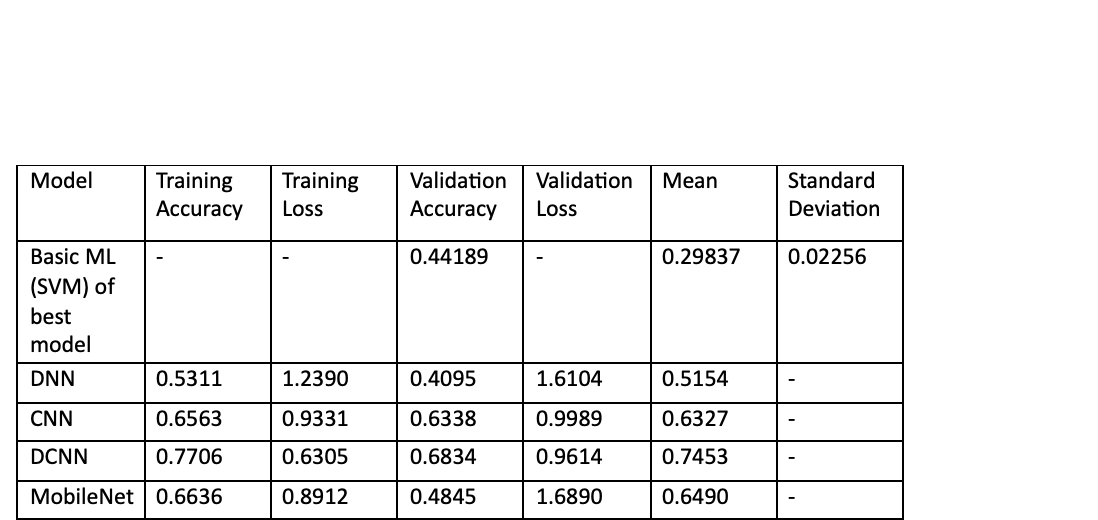

Above table potrarys that the DCNN and CNN models are the superior models for Emotion Classification dataset. The validation accuracy of both the models are 0.6834 and 0.6338 respectively are the best model since we are hypertuning the CNN with multiple layers to achieve high accuracy. 

Also, when we are using the DNN with learning rate of 0.0001 and a batch size of 128 after 30 epochs the model achieved 0.4088 validation accuracy. As it can be seen towards the end of training (epoch 26) the model started to overfit. This is not a good performing learning rate since the model is hypertuned to most parameters. the reason for this unusual behavior is unknown and can be a study for our future prespective.

Now the ML model as per our expectation the Random forest and SVM preforms slightly better than the Logistic regression since the data is sparse and categorical.Though we gained the maximum accuracy from the SVM i.e. 0.4418. It is unlikely that the ML would perform better for this dataset. Thus, ML algorithm has its limitation.

Now lastly for transfer learning, we investigated on many pre-trained algorithm such as EfficientNet, MobileNet, RestNet, and many others and have optimally caliberated the parameters, however, we did not see any reasonable chnages in transfer learning accuracy. We only provided the MobileNet algorithm for a reference. The performance of the MobileNet model was enhanced and overfitting was decreased by data augmentation. Finally we can get accuracy as 0.4845 but it is still low compared to the DCNN and CNN by a significant amount. But this accuracy is higher than ML basic and DNN so can be preffered over them. We have not show the output of standard deviation and mean since there was a compilation error, but have calculated it individually. 

Our future prospect would be to have various data augmentation methods implemented, such as scaling and shearing, to produce more varied training data. To further enhance the model's performance, hyperparameter adjustment might be used for all the models.

##Discussion:

According to the results the best performing model for this task was the DCNN which achieved the highest accuracy among all the models that were used. Its complex architecture seems to be able to handle this particular dataset much better than the other models, and predict the target label (emotion) more effectively, achieving a validation accuracy 0.6834 and test accuracy 0.6525 in Kaggle, while the next best performing model achieved 0.6338. Additionally, the DCNN model required less computational power compared to other complex models such as MobileNet, and converged faster which makes it more efficient. Therefore, the model that we would recommend for the emotions recognition task is the DCNN. 

When it comes to what further steps we could take to get better wins for this task, there are several things that we could do. The first thing would be to experiment with even more different configurations of the models such as fine-tuning hyperparameters and trying different activation functions. Additionally, as there are various transfer learning models, there is a lot of room for experimenting with many of these models to find the one that performs the best for this particular dataset. Also, another thing that we believe that could help is the use of cross-validation in order to get a robust performance.

#Reference:

[1] J. Brownlee, “A Gentle Introduction to the Rectified Linear Unit (ReLU) for Deep Learning Neural Networks,” Machine Learning Mastery, Apr. 20, 2019. https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

[2] S. Krishnan, “How to determine the number of layers and neurons in the hidden layer?,” Medium, Sep. 10, 2021. https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3 

[3] J. Brownlee, “Softmax Activation Function with Python,” Machine Learning Mastery, Oct. 18, 2020. https://machinelearningmastery.com/softmax-activation-function-with-python/